# digits tell image
# target tell image value

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
dir(digits)     #these all items are in load_digits

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]     #this is 1st image in form of a 1D array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# We can also print this image

<Figure size 432x288 with 0 Axes>

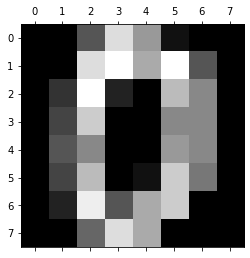

In [5]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

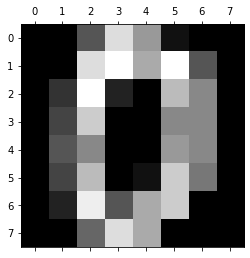

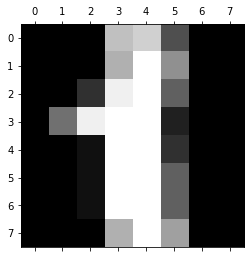

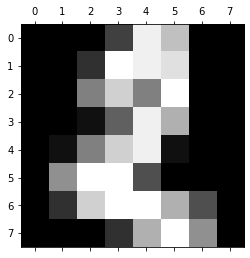

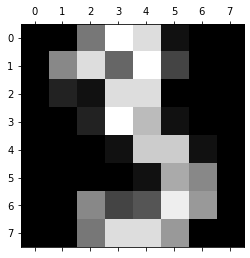

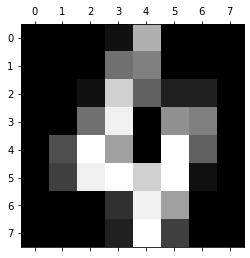

In [6]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [7]:
digits.target[0:5]    #tells images value

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [10]:
len(x_train)

1437

In [11]:
len(x_test)

360

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [14]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [15]:
pipe.score(x_test,y_test)

0.9722222222222222

In [16]:
digits.target[10:15]

array([0, 1, 2, 3, 4])

In [18]:
pipe.predict(digits.data[10:15])

array([0, 1, 2, 3, 4])

In [19]:
pipe.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# to find out where did it fail as score probability is 98%

In [21]:
y_predicted = pipe.predict(x_test)
from sklearn.metrics import confusion_matrix

In [22]:
y_predicted

array([4, 1, 6, 4, 9, 7, 8, 7, 8, 0, 4, 1, 0, 4, 9, 6, 5, 7, 8, 5, 5, 1,
       3, 4, 8, 0, 8, 7, 4, 3, 6, 0, 6, 6, 4, 8, 9, 4, 2, 8, 2, 4, 6, 0,
       2, 2, 5, 5, 1, 3, 9, 3, 9, 5, 0, 1, 0, 4, 7, 1, 3, 3, 7, 0, 0, 3,
       4, 1, 6, 4, 5, 1, 8, 8, 5, 9, 2, 5, 0, 0, 5, 5, 2, 3, 8, 3, 1, 0,
       3, 1, 5, 5, 1, 9, 8, 6, 0, 2, 2, 1, 4, 0, 3, 5, 0, 1, 2, 4, 7, 6,
       4, 7, 5, 9, 4, 8, 1, 1, 9, 1, 1, 0, 9, 6, 9, 6, 9, 3, 1, 3, 7, 5,
       8, 0, 8, 4, 5, 7, 5, 0, 0, 1, 3, 0, 7, 9, 3, 7, 6, 2, 6, 1, 1, 8,
       4, 8, 7, 3, 5, 4, 6, 4, 4, 1, 3, 9, 2, 6, 6, 5, 3, 6, 9, 1, 8, 6,
       7, 3, 9, 9, 5, 3, 4, 0, 9, 8, 4, 0, 5, 3, 3, 2, 8, 9, 0, 2, 9, 8,
       0, 4, 8, 5, 5, 4, 0, 3, 8, 2, 9, 2, 6, 5, 7, 3, 7, 6, 4, 5, 5, 5,
       9, 7, 8, 1, 3, 1, 2, 6, 0, 9, 2, 0, 4, 2, 8, 0, 5, 6, 1, 7, 9, 5,
       7, 2, 2, 3, 4, 2, 7, 3, 3, 0, 9, 5, 1, 5, 8, 5, 1, 9, 6, 4, 7, 6,
       7, 7, 5, 4, 7, 8, 9, 8, 2, 2, 9, 0, 9, 9, 4, 4, 5, 3, 0, 5, 3, 0,
       7, 3, 3, 6, 7, 7, 2, 3, 7, 3, 0, 9, 9, 8, 9,

In [23]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 38]], dtype=int64)

C:\Python3.10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


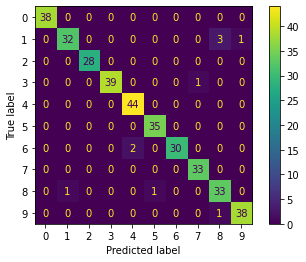

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, x_test, y_test)  
plt.show()